In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import exp

#preprocessing

In [41]:
df = pd.read_csv("L:/bucket/kinetics/0838_010_exercise.txt", sep='\t')

In [42]:
df = df.filter(['TCD1'])

In [43]:
df = df.drop([df.index[0], df.index[1]])

In [44]:
df['TCD1'] = df['TCD1'].astype(float)

In [45]:
df = df.reset_index()

In [46]:
df.drop(['index'], axis=1, inplace=True)

In [47]:
tcd1= df.filter(['TCD1'])

#time1=3
#timearray=[]
#for i in tcd1.iterrows():
    #timearray.append(time1)
    #time1+=3
#df['Time']=timearray
#print(tcd1)
#print(df)

recs=len(df['TCD1'])
print(recs)
i=1
timevals=[]
while i<=recs:
    t=3*i
    timevals.append(t)
    i+=1
df['Time']=timevals
#df=df.set_index('Time')
print(df)

220
          TCD1  Time
0    66.402384     3
1    58.545520     6
2    62.347291     9
3    61.162178    12
4    53.424063    15
..         ...   ...
215  77.533913   648
216  80.159392   651
217  85.376937   654
218  75.284750   657
219  68.262717   660

[220 rows x 2 columns]


          TCD1  Time
0    66.402384     3
1    58.545520     6
2    62.347291     9
3    61.162178    12
4    53.424063    15
..         ...   ...
215  77.533913   648
216  80.159392   651
217  85.376937   654
218  75.284750   657
219  68.262717   660

[220 rows x 2 columns]


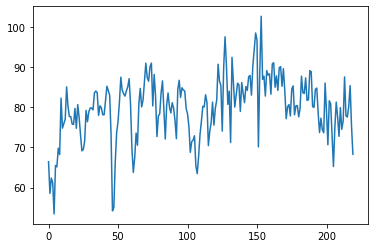

In [48]:
plt.plot(df['TCD1'])
print(df)

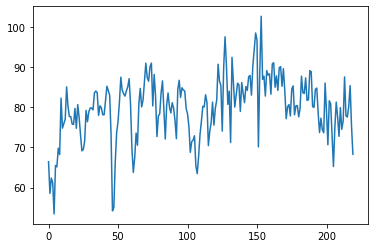

In [49]:
plt.plot(df['TCD1'])

#Curve fitting

In [50]:
def func(y0, amp, TD, tau, t):
    return y0 + amp * (1 - exp(((t*-1)-TD)/tau))

In [51]:
xdata = df.index.values
ydata = df['TCD1']

In [52]:
popt, _ = curve_fit(func, xdata, ydata)

In [58]:
y0 = popt[0]*-1
amp = popt[1]
TD = popt[2]
tau = popt[3]
t= df['Time']
print(y0)
print(amp)
print(TD)
print(tau)

47.9481815894219
128.71276218110137
270.91269531422466
131.90450416619572


In [59]:
def func(y0, amp, TD, tau, t):
    return y0 + amp * (1 - exp(((t*-1)-TD)/tau))
my_time= df['Time']
x=[]
i=1
while i <= 660:
    x.append(i)
    i+=1
y = []
for r in my_time:
    y.append(float(func(y0, amp, TD, tau, r)))
print(my_time)
print(y)
   # myval = y0 + amp * (1 - exp(((r*-1)-TD)/tau))
   # float(myval)
   # y.append(myval)
#print(my_time)
#print(y)

Time
3        3
6        6
9        9
12      12
15      15
      ... 
648    648
651    651
654    654
657    657
660    660
Name: Time, Length: 220, dtype: int64
[160.52604142252395, 160.88886758315132, 161.24353485815323, 161.59022671669993, 161.92912250228355, 162.2603975254923, 162.5842231546985, 162.90076690470744, 163.21019252341264, 163.5126600765025, 163.8083260302622, 164.09734333251373, 164.37986149173545, 164.6560266544031, 164.9259816805909, 165.18986621787326, 165.44781677356428, 165.69996678533292, 165.9464466902302, 166.18738399216423, 166.4229033278579, 166.65312653132347, 166.878172696887, 167.09815824079604, 167.31319696144155, 167.52340009822572, 167.72887638910615, 167.92973212684578, 168.12607121399827, 168.31799521665653, 168.50560341699287, 168.68899286461777, 168.86825842678326, 169.04349283745802, 169.2147867452984, 169.38222876054095, 169.54590550084055, 169.7059016360775, 169.8622999321574, 170.01518129382572, 170.16462480651984, 170.31070777727996, 170.4535

In [60]:
df=df.set_index(df['Time'])
df['Y']=y
df

,TCD1,Time,Y
Time,,,
3,66.402384,3,160.526041
6,58.545520,6,160.888868
9,62.347291,9,161.243535
12,61.162178,12,161.590227
15,53.424063,15,161.929123
...,...,...,...
648,77.533913,648,176.539574
651,80.159392,651,176.542304
654,85.376937,654,176.544971


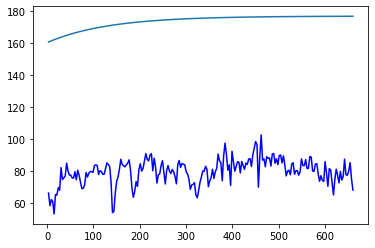

In [61]:
plt.plot(df['TCD1'], 'b-')
plt.plot(my_time, y, label='y = y0 + amp * (1 - exp((-t-TD)/tau))')

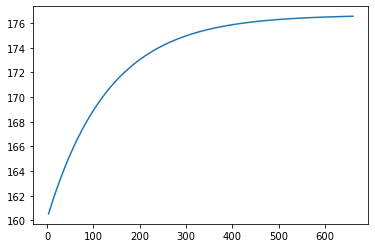

In [62]:
plt.plot(my_time, y, label='y = y0 + amp * (1 - exp((-t-TD)/tau))')